In [113]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv("/Users/taran/Desktop/Thesis/hour.csv")

In [115]:
rides.head()

,dteday,cnt
0,01/01/2011,1
1,01/01/2011,1
2,01/01/2011,1
3,01/01/2011,1
4,01/01/2011,1


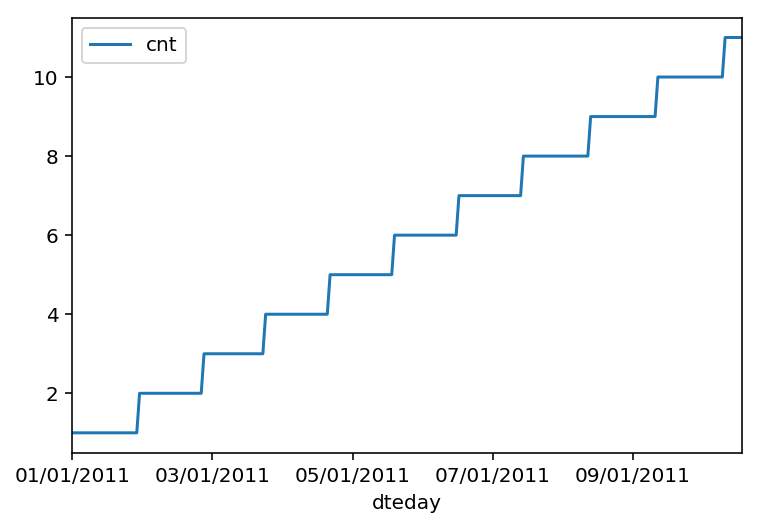

In [116]:
rides[:24*10].plot(x='dteday', y='cnt')

In [117]:
data = rides
data.head()

,dteday,cnt
0,01/01/2011,1
1,01/01/2011,1
2,01/01/2011,1
3,01/01/2011,1
4,01/01/2011,1


In [118]:
import time
import datetime
newtime = []
for i in data.dteday:
    newtime.append(time.mktime(datetime.datetime.strptime(i, "%d/%m/%Y").timetuple()))
data.dteday=newtime

In [119]:
quant_features = ['cnt', 'dteday']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for_reference_std = 0
for_reference_mean = 0
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    for_reference_std = std
    for_reference_mean = mean
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [120]:
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
train_features, train_targets = features, targets

In [133]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.9, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.9, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        #### TODO: Set self.activation_function to your implemented sigmoid function ####
        #
        # Note: in Python, you can define a function with a lambda expression,
        # as shown below.
        self.activation_function = lambda x : 1/(1+np.exp(-x))  # Replace 0 with your sigmoid calculation.
        
        ### If the lambda code above is not something you're familiar with,
        # You can uncomment out the following three lines and put your 
        # implementation there instead.
        #
        #def sigmoid(x):
        #    return 0  # Replace 0 with your sigmoid calculation here
        #self.activation_function = sigmoid
                    

    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            # Implement the forward pass function below
            final_outputs, hidden_outputs = self.forward_pass_train(X)  
            
            # Implement the backproagation function below
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):
        ''' Implement forward pass here 
         
            Arguments
            ---------
            X: features batch
        '''
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer - Replace these values with your calculations.
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # TODO: Output layer - Replace these values with your calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
         
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
        '''
        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error - Replace this value with your calculations.
        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
        
        # TODO: Backpropagated error terms - Replace these values with your calculations.
        output_error_term = error * 1
        
        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, self.weights_hidden_to_output.T)
        hidden_error_term = hidden_error*hidden_outputs*(1-hidden_outputs)

        # Weight step (input to hidden)
        delta_weights_h_o += output_error_term * hidden_outputs[:, None] 
        delta_weights_i_h += np.dot(X[:, None], hidden_error_term.reshape(1,self.hidden_nodes)) 

       	# Weight step (hidden to output)
        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records
        '''
        self.weights_hidden_to_output += self.lr*delta_weights_h_o/float(n_records)  # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr*delta_weights_i_h/float(n_records) # update input-to-hidden weights with gradient descent step

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer - Replace these values with the appropriate calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs


#########################################################
# Set your hyperparameters here
##########################################################
iterations = 3000
learning_rate = 0.3
hidden_nodes = 8
output_nodes = 1

In [134]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [135]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.016s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In [136]:
import sys

####################
### Set the hyperparameters in you myanswers.py file ###
####################

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)


Progress: 100.0% ... Training loss: 0.000

In [138]:
print(data.dteday)

0       -1.742972
1       -1.742972
2       -1.742972
3       -1.742972
4       -1.742972
5       -1.742972
6       -1.742972
7       -1.742972
8       -1.742972
9       -1.742972
10      -1.742972
11      -1.742972
12      -1.742972
13      -1.742972
14      -1.742972
15      -1.742972
16      -1.742972
17      -1.742972
18      -1.742972
19      -1.742972
20      -1.742972
21      -1.742972
22      -1.742972
23      -1.742972
24      -1.738212
25      -1.738212
26      -1.738212
27      -1.738212
28      -1.738212
29      -1.738212
           ...   
17349    1.727285
17350    1.727285
17351    1.727285
17352    1.727285
17353    1.727285
17354    1.727285
17355    1.732046
17356    1.732046
17357    1.732046
17358    1.732046
17359    1.732046
17360    1.732046
17361    1.732046
17362    1.732046
17363    1.732046
17364    1.732046
17365    1.732046
17366    1.732046
17367    1.732046
17368    1.732046
17369    1.732046
17370    1.732046
17371    1.732046
17372    1.732046
17373    1

In [139]:
print(data.cnt)

0       -1.743081
1       -1.743081
2       -1.743081
3       -1.743081
4       -1.743081
5       -1.743081
6       -1.743081
7       -1.743081
8       -1.743081
9       -1.743081
10      -1.743081
11      -1.743081
12      -1.743081
13      -1.743081
14      -1.743081
15      -1.743081
16      -1.743081
17      -1.743081
18      -1.743081
19      -1.743081
20      -1.743081
21      -1.743081
22      -1.743081
23      -1.743081
24      -1.738321
25      -1.738321
26      -1.738321
27      -1.738321
28      -1.738321
29      -1.738321
           ...   
17349    1.727157
17350    1.727157
17351    1.727157
17352    1.727157
17353    1.727157
17354    1.727157
17355    1.731917
17356    1.731917
17357    1.731917
17358    1.731917
17359    1.731917
17360    1.731917
17361    1.731917
17362    1.731917
17363    1.731917
17364    1.731917
17365    1.731917
17366    1.731917
17367    1.731917
17368    1.731917
17369    1.731917
17370    1.731917
17371    1.731917
17372    1.731917
17373    1

In [142]:
ad_hoc_test_input = data.dteday
for i in ad_hoc_test_input:
    print(scaled_features['cnt'][0]+(scaled_features['cnt'][1]*(network.run(i).T)))

[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 16.30598314]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.07795148]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239]]
[[ 17.85119239

[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 61.47533256]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 62.31730007]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544]]
[[ 63.16048544

[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 101.40404875]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 102.30021663]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.19751715]]
[[ 103.197

[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 150.4029748]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 151.35560301]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.30921783]]
[[ 152.3092

[[ 194.19930859]]
[[ 194.19930859]]
[[ 194.19930859]]
[[ 194.19930859]]
[[ 194.19930859]]
[[ 194.19930859]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 195.19287185]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 196.18725841]]
[[ 197.18246423]]
[[ 197.182

[[ 242.74650816]]
[[ 242.74650816]]
[[ 242.74650816]]
[[ 242.74650816]]
[[ 242.74650816]]
[[ 242.74650816]]
[[ 242.74650816]]
[[ 242.74650816]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 243.77479152]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 244.80368827]]
[[ 245.833

[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 301.18387729]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 302.23894159]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 303.2943379]]
[[ 

[[ 352.10889219]]
[[ 352.10889219]]
[[ 352.10889219]]
[[ 352.10889219]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 353.17383188]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 354.23884392]]
[[ 355.30392279]]
[[ 355.30392279]]
[[ 355.30392279]]
[[ 355.303

[[ 411.70449838]]
[[ 411.70449838]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 412.76502955]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 413.8253264]]
[[ 414.88538355]]
[[ 414.88538355]]
[[ 414.88538355]]
[[ 414.88538355]]
[[ 414.88538355]]
[[ 414.88538355]]
[[ 414.88538355]

[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 463.25352558]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 464.29637741]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.33873926]]
[[ 465.338

[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 518.74597275]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 519.75550127]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.76428716]]
[[ 520.764

[[ 568.2319123]]
[[ 568.2319123]]
[[ 568.2319123]]
[[ 568.2319123]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 569.19934583]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 570.16584112]]
[[ 571.13139469]]
[[ 571.13139469]]
[[ 571.13139469]]
[[ 571.1313946

[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 621.78331704]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 622.69223504]]
[[ 623.60004494]]
[[ 623.60004494]]
[[ 623.60004494]]
[[ 623.60004494]]
[[ 623.60004494]]
[[ 623.60004494]]
[[ 623.60004494]]
[[ 623.60004494]]
[[ 623.600

[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 664.1226121]]
[[ 665.01141978]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 665.86344481]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]]
[[ 666.71426299]